<h1><center> Optimisation des Primes d'Assurance : Sélection des Meilleurs Modèles pour la Prédiction de la Fréquence et du Coût des Sinistres </center></h1>

### 1. Chargement du jeu de données

In [56]:
# Librairies :
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MaxAbsScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, make_scorer, f1_score, r2_score, mean_squared_error, mean_absolute_error
from joblib import dump

In [60]:
model_couts_corporels = joblib.load('model_couts_corporels.joblib')

In [61]:
model_couts_materiels = joblib.load('model_couts_materiels.joblib')

In [62]:
model_frequence_corporel = joblib.load('model_frequence_corporel.joblib')

In [63]:
model_frequence_materiel = joblib.load('model_frequence_materiel.joblib')

In [64]:
# Load the dataset :
df = pd.read_csv("training_clean.csv")
df.head()

,PolNum,CalYear,Gender,Type,Category,Occupation,Age,Group1,Bonus,Poldur,Value,Adind,SubGroup2,Group2,Density,Exppdays,Numtppd,Numtpbi,Indtppd,Indtpbi
0,200114978,2009,Male,C,Large,Employed,25,18,85,3,15080.0,0,L46,L,72.012883,365.0,1,0,0.0,0.0
1,200114994,2009,Male,E,Large,Employed,20,11,30,2,22370.0,1,O38,O,39.550411,365.0,1,0,0.0,0.0
2,200115001,2009,Female,E,Large,Unemployed,42,11,85,0,39650.0,0,Q28,Q,169.529148,365.0,2,0,0.0,0.0
3,200115011,2009,Female,C,Medium,Housewife,21,5,0,0,12600.0,1,L6,L,58.894688,365.0,1,0,0.0,0.0
4,200115015,2009,Female,D,Large,Employed,33,12,30,10,9065.0,0,N4,N,109.631885,365.0,2,0,0.0,0.0


In [65]:
df.describe()

,PolNum,CalYear,Age,Group1,Bonus,Poldur,Value,Adind,Density,Exppdays,Numtppd,Numtpbi,Indtppd,Indtpbi
count,9.997900e+04,99979.000000,99979.000000,99979.000000,99979.000000,99979.000000,99979.000000,99979.000000,99979.000000,99979.000000,99979.000000,99979.000000,99979.000000,99979.000000
mean,2.002003e+08,2009.499935,41.124126,10.691725,-9.374319,5.470579,16358.767416,0.512178,117.142810,349.821137,0.147391,0.046780,106.110750,222.793486
std,6.217119e+04,0.500002,14.301168,4.687371,42.481030,4.591067,10253.792535,0.499854,79.493407,26.019809,0.436855,0.219528,444.979787,1859.763345
min,2.001149e+08,2009.000000,18.000000,1.000000,-50.000000,0.000000,1000.000000,0.000000,14.377142,302.500000,0.000000,0.000000,0.000000,0.000000
25%,2.001399e+08,2009.000000,30.000000,7.000000,-40.000000,1.000000,8380.000000,0.000000,50.566406,340.000000,0.000000,0.000000,0.000000,0.000000
50%,2.001649e+08,2009.000000,40.000000,11.000000,-30.000000,4.000000,14605.000000,1.000000,94.364623,365.000000,0.000000,0.000000,0.000000,0.000000
75%,2.002608e+08,2010.000000,51.000000,14.000000,10.000000,9.000000,22565.000000,1.000000,174.644525,365.000000,0.000000,0.000000,0.000000,0.000000
max,2.002858e+08,2010.000000,75.000000,20.000000,85.000000,15.000000,43842.500000,1.000000,297.385170,365.000000,7.000000,3.000000,12878.369910,69068.026292


### 2. Pré-traitement des données

In [66]:
df=df.iloc[21:]

In [67]:
bins = [18, 25, 40, 60, 100]   
labels = ['18-24', '25-39', '40-59', '60+']  # Les labels correspondent aux tranches d'âge

df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
df['Age_Bonus'] = df['Age'] * df['Bonus']

# Vérifier le résultat
df[['Age', 'AgeGroup']].head()
grouped_counts = df.groupby('AgeGroup')['Numtpbi'].value_counts().unstack(fill_value=0)

print(grouped_counts)

Numtpbi       0     1   2  3
AgeGroup                    
18-24     11924  1209  76  2
25-39     34538  1695  56  2
40-59     36733  1160  27  2
60+       12262   269   3  0


/tmp/ipykernel_83744/1466526461.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_counts = df.groupby('AgeGroup')['Numtpbi'].value_counts().unstack(fill_value=0)


### 3. Implementation des meilleurs modèles de prédiction du nombre de réclamations et des coûts totaux corporels et matériels

#### a. Implementation du modèle d'apprentissage pour prédire le nombre de réclamations pour blessures corporelles de tiers : 

In [68]:
# Split the data into features and target variable
X = df[['Gender', 'Type', 'Category', 'Occupation', 'PolNum', 'CalYear', 'Age', 'Adind', 'Density', 'Bonus', 'Exppdays', 'Poldur','Value','Group2']]
y = df['Numtpbi']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [69]:
numeric_features = X.select_dtypes(exclude=['object', 'bool']).columns
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_features = X.select_dtypes(include=['object', 'bool']).columns
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [70]:
y_pred_rf = model_frequence_corporel.predict(X_test)

#### b. Implementation du modèle d'apprentissage pour prédire le nombre de réclamations matérielles de tiers : 

In [71]:
# Split the data into features and target variable
X_fm = df[['Gender', 'Type', 'Category', 'Occupation', 'PolNum', 'CalYear', 'Age', 'Adind', 'Density', 'Bonus', 'Exppdays', 'Poldur','Value','Group2']]
y_fm = df['Numtppd']

# Split the data into training and testing sets
X_train_rfm, X_test_rfm, y_train_rfm, y_test_rfm = train_test_split(X_fm, y_fm, test_size=0.2, random_state=42)

In [72]:
numeric_features = X_fm.select_dtypes(exclude=['object', 'bool']).columns
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_features = X_fm.select_dtypes(include=['object', 'bool']).columns
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [73]:
y_pred_rfm = model_frequence_materiel.predict(X_test_rfm)

#### c. Implementation du modèle d'apprentissage pour prédire le coût total des réclamations pour blessures corporelles de tiers:

In [74]:
# List of column names to select
columns_to_select_Ind = ['Gender', 'Type', 'Category', 'Occupation', 'PolNum', 'CalYear', 'Age', 'Adind', 'Density', 'Bonus', 'Exppdays', 'Poldur','Value','Group2']

# Select the columns and assign them to X
X_Ind = df[columns_to_select_Ind] # features
y_Ind = df["Indtpbi"] # target variable

In [75]:
# Applying a pipeline on categorical and numerical feature
categorical_features = X_Ind.select_dtypes(include=['object', 'bool']).columns
numerical_features = X_Ind.select_dtypes(exclude=['object', 'bool']).columns

In [76]:
# Handling missing data and normalization of numeric data with MAX Abs Scaler
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),  # Replace missing numeric data by the median
    ("scaler", StandardScaler())])  # Normalization of numeric data after imputing for the missing values

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='Not defined')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])  # Handling missing categorical data

In [77]:
# Define the features preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [78]:
# As our target variable can be imbalanced
X_train_Ind, X_test_Ind, y_train_Ind, y_test_Ind = train_test_split(X_Ind, y_Ind, test_size=0.2, random_state=42)

In [79]:
y_pred_rf_grid_Ind = model_couts_corporels.predict(X_test_Ind)

#### d. Implementation du modèle d'apprentissage pour prédire le coût total des réclamations matérielles de tiers

In [80]:
# List of column names to select
columns_to_select_Ind = ['Gender', 'Type', 'Category', 'Occupation', 'PolNum', 'CalYear', 'Age', 'Adind', 'Density', 'Bonus', 'Exppdays', 'Poldur','Value','Group2']

# Select the columns and assign them to X
X_Ind_ppd = df[columns_to_select_Ind] # features
y_Ind_ppd = df["Indtppd"] # target variable

In [81]:
# Applying a pipeline on categorical and numerical feature
categorical_features = X_Ind_ppd.select_dtypes(include=['object', 'bool']).columns
numerical_features = X_Ind_ppd.select_dtypes(exclude=['object', 'bool']).columns

In [82]:
# Handling missing data and normalization of numeric data with MAX Abs Scaler
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),  # Replace missing numeric data by the median
    ("scaler", StandardScaler())])  # Normalization of numeric data after imputing for the missing values

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='Not defined')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])  # Handling missing categorical data

In [83]:
# Define the features preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [84]:
# As our target variable can be imbalanced
X_train_Ind_ppd, X_test_Ind_ppd, y_train_Ind_ppd, y_test_Ind_ppd = train_test_split(X_Ind_ppd, y_Ind_ppd, test_size=0.2, random_state=42)

In [85]:
# Make predictions
y_pred_rf_grid_Ind_ppd = model_couts_materiels.predict(X_test_Ind_ppd)

### 4. Calcul des primes annuelles destinées à couvrir les dommages matériels et corporels 

#### a. Calcul de la prime annuelle destinée à couvrir les dommages corporels 

In [39]:
# Bodily premium insurance
Prime_Predite= y_pred_rf * y_pred_rf_grid_Ind
prime_reelle = y_test * y_test_Ind

# Creation of a data frame to compare
comparaison_primes = pd.DataFrame({
    'Prime_Reelle': prime_reelle,
    'Prime_Predite': Prime_Predite
})

# Displaying the DataFrame
comparaison_primes.head(50)

,Prime_Reelle,Prime_Predite
38916,0.000000,4.682936
599,0.000000,4.815691
83171,0.000000,3.146275
27500,0.000000,6.872145
48832,0.000000,0.732147
11334,0.000000,1.286215
28467,0.000000,12.511862
68267,0.000000,35.786082
83717,0.000000,8.739482
16282,0.000000,3.763093


In [40]:
# Computing the metrics to evaluate our results 
# Calculate and print MAE (Mean Absolute Error)
mae = mean_absolute_error(prime_reelle, Prime_Predite)

# Calculate and print MSE (Mean Squared Error)
mse = mean_squared_error(prime_reelle, Prime_Predite)

# Calculate and print RMSE (Root Mean Squared Error)
rmse = np.sqrt(mse)

# Calculate and print R2 SCORE
r2 = r2_score(prime_reelle, Prime_Predite)

# Calculate and print MAPE (Mean Absolute Percentage Error)
mape = np.mean(np.abs((prime_reelle - Prime_Predite) / prime_reelle)) * 100

# Create a dictionary to store the results
results = {
    'Metric': ['MAE', 'MSE', 'RMSE', 'R2 SCORE', 'MAPE'],
    'Value': [mae, mse, rmse, r2, mape]
}

# Create a DataFrame from the results dictionary
results_df = pd.DataFrame(results)

# Print the DataFrame
print("Performance Metrics:")
(results_df)

Performance Metrics:


,Metric,Value
0,MAE,2.504229e+02
1,MSE,4.127844e+06
2,RMSE,2.031710e+03
3,R2 SCORE,-9.932722e-03
4,MAPE,inf


In [43]:
# Calculate residuals
residuals = prime_reelle - Prime_Predite

# Identify outliers
outliers = comparaison_primes[np.abs(residuals) > 3 * np.std(residuals)]

# Display outliers
print("Outliers:")
(outliers)

Outliers:


,Prime_Reelle,Prime_Predite
9515,10042.312894,79.779584
2535,26158.987550,5.676650
50331,14081.067978,63.355747
98921,9911.260983,16.572107
58804,14037.739515,4.023328
...,...,...
56782,14174.021489,14.442897
88144,24936.819357,7.017299
6268,6489.133075,5.513176
50494,19830.467615,9.199453


In [44]:
# Pearson correlation coefficient
correlation = np.corrcoef(prime_reelle, Prime_Predite)[0, 1]

# Mean difference between actual and predicted values
mean_difference = np.mean(prime_reelle - Prime_Predite)

print("Pearson Correlation Coefficient:", correlation)
print("Mean Difference between Actual and Predicted Values:", mean_difference)


Pearson Correlation Coefficient: 0.07600369224061458
Mean Difference between Actual and Predicted Values: 222.04006167517105


Le coefficient de Pearson, étant proche de 0, indique une faible corrélation positive, ce qui signifie que les primes réelles et prédites augmentent ensemble. 
Pour la différence moyenne entre les valeurs réelles et prédites, étant une différence positive, cela indiquerait une tendance à sous-estimer les valeurs réelles. 
Cela est due à notre base de données très réduite.

#### b. Calcul de la prime annuelle destinée à couvrir les dommages matériels

In [47]:
# Material remium insurance 
prime_predi_mat = y_pred_rfm * y_pred_rf_grid_Ind_ppd
prime_mat = y_test_rfm * y_test_Ind_ppd

# Creation of a data frame to compare
comparaison_primes_material = pd.DataFrame({
    'Prime_Reelle_mat': prime_mat,
    'Prime_Predite_mat': prime_predi_mat
})

# Displaying the DataFrame
comparaison_primes_material.head(50)

,Prime_Reelle_mat,Prime_Predite_mat
38916,0.000000,9.083605
599,583.350978,12.677866
83171,0.000000,14.073235
27500,0.000000,23.672876
48832,0.000000,2.119436
11334,0.000000,3.603490
28467,0.000000,40.492529
68267,0.000000,229.786815
83717,0.000000,21.451289
16282,0.000000,5.308246


In [48]:
# Computing the metrics to evaluate our results 
# Compute MAE (Mean Absolute Error)
mae = mean_absolute_error(prime_mat, prime_predi_mat)

# Compute MSE (Mean Squared Error)
mse = mean_squared_error(prime_mat, prime_predi_mat)

# Compute RMSE (Root Mean Squared Error)
rmse = np.sqrt(mse)

# Compute R2 SCORE
r2 = r2_score(prime_mat, prime_predi_mat)

# Compute MAPE (Mean Absolute Percentage Error)
mape = np.mean(np.abs((prime_mat - prime_predi_mat) / prime_mat)) * 100

# Create a dictionary to store the results
results = {
    'Metric': ['MAE', 'MSE', 'RMSE', 'R2 SCORE', 'MAPE'],
    'Value': [mae, mse, rmse, r2, mape]
}

# Create a DataFrame from the results dictionary
results_df = pd.DataFrame(results)

# Print the DataFrame
print("Performance Metrics:")
(results_df)

Performance Metrics:


,Metric,Value
0,MAE,1.794256e+02
1,MSE,9.925588e+05
2,RMSE,9.962725e+02
3,R2 SCORE,3.258304e-02
4,MAPE,inf


In [53]:
# Calculate residuals
residuals_material = prime_mat - prime_predi_mat 

# Identify outliers
outliers = comparaison_primes_material[np.abs(residuals_material) > 3 * np.std(residuals_material)]

# Display outliers
print("Outliers:")
(outliers)

Outliers:


,Prime_Reelle_mat,Prime_Predite_mat
52345,4581.192957,16.462432
48052,9015.002119,272.034939
21359,4262.740888,194.813874
73505,4089.632028,6.898689
92948,3975.119133,309.623623
...,...,...
98136,6086.046061,811.261209
29952,4247.088016,239.075964
94859,5677.430552,86.455247
29620,15482.944488,128.014664


In [54]:
# Pearson correlation coefficient
correlation = np.corrcoef(prime_mat, prime_predi_mat)[0, 1]

# Mean difference between actual and predicted values
mean_difference = np.mean(prime_mat - prime_predi_mat)

print("Pearson Correlation Coefficient:", correlation)
print("Mean Difference between Actual and Predicted Values:", mean_difference)

Pearson Correlation Coefficient: 0.2796629824963426
Mean Difference between Actual and Predicted Values: 108.94810286177923


Le coefficient de Pearson, étant proche de 0, indique une faible corrélation positive, ce qui signifie que les primes réelles et prédites augmentent ensemble. 
Pour la différence moyenne entre les valeurs réelles et prédites, étant une différence positive, cela indiquerait une tendance à sous-estimer les valeurs réelles.

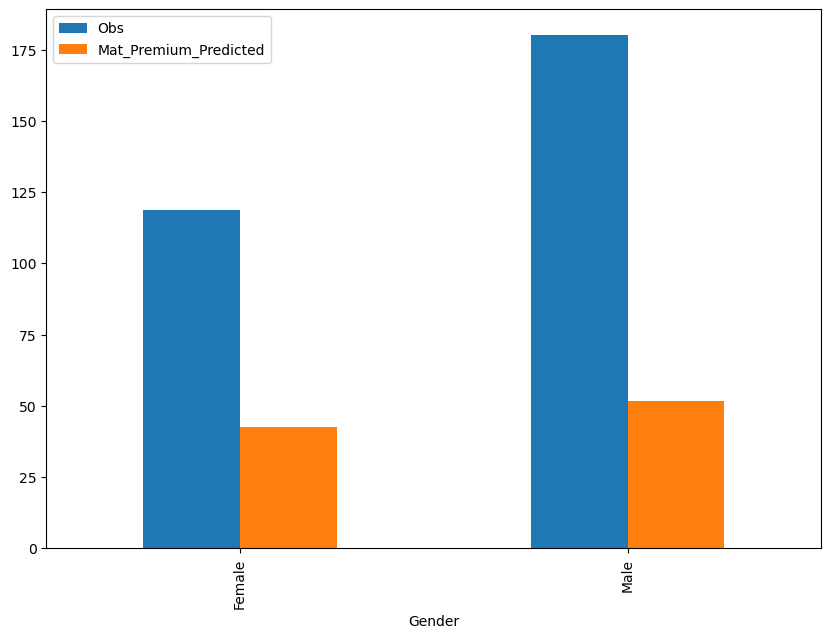

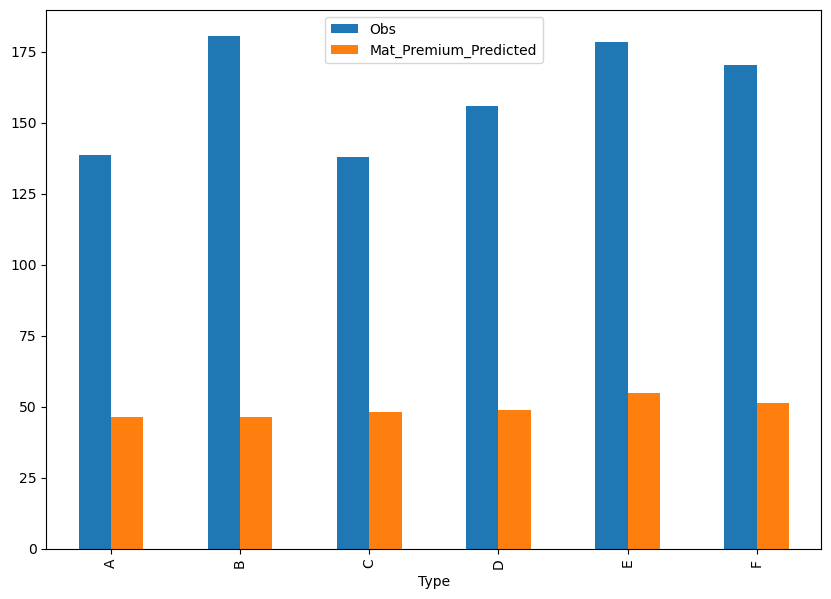

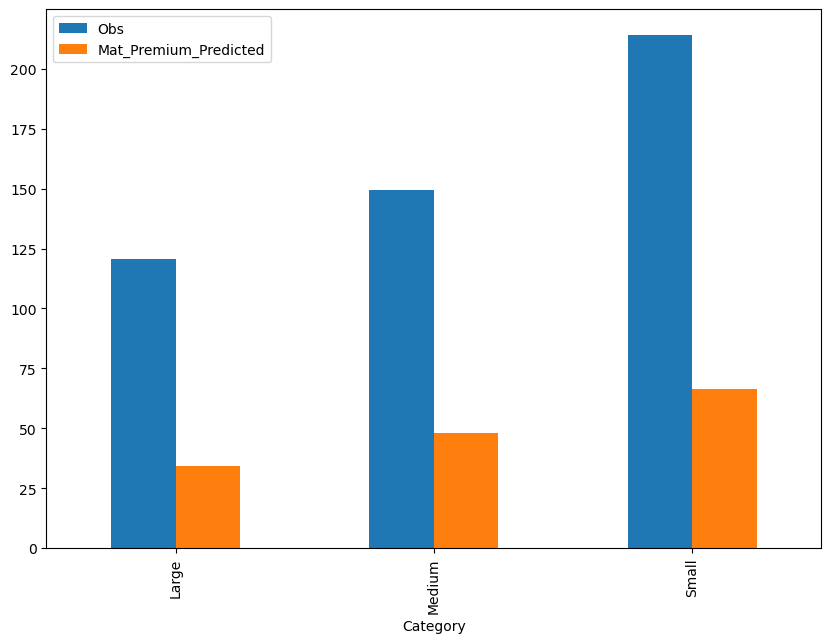

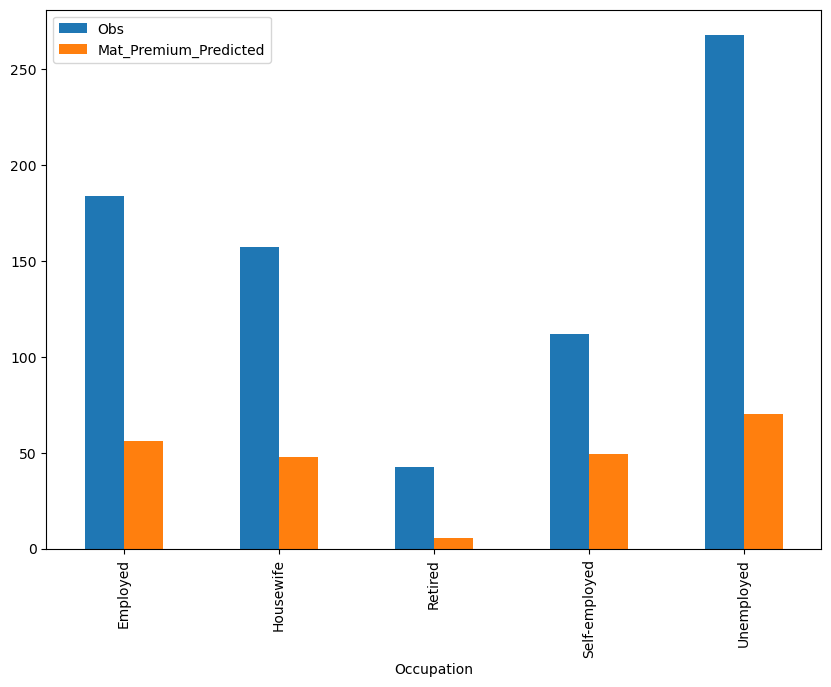

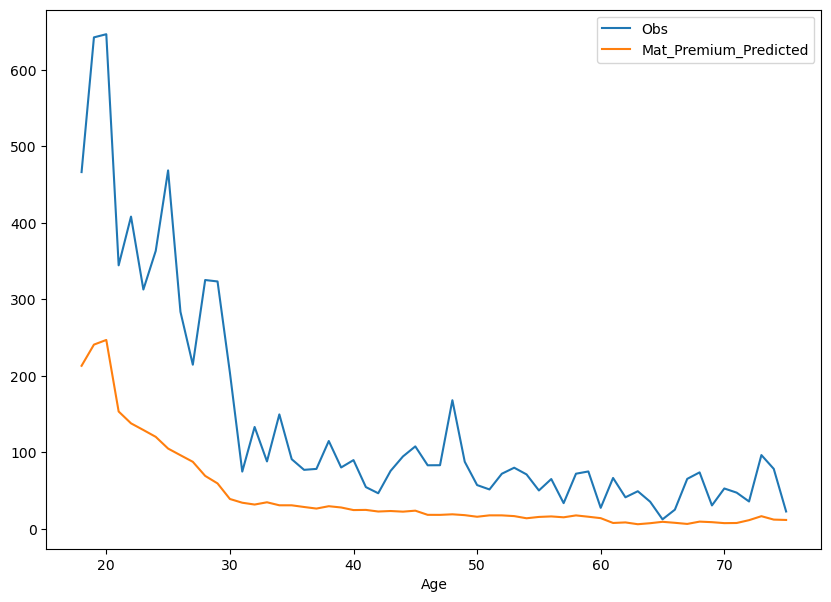

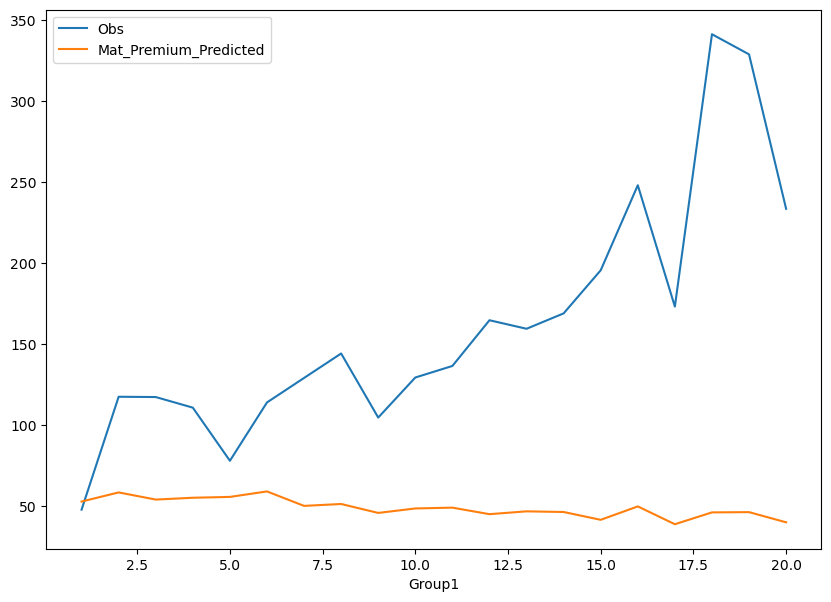

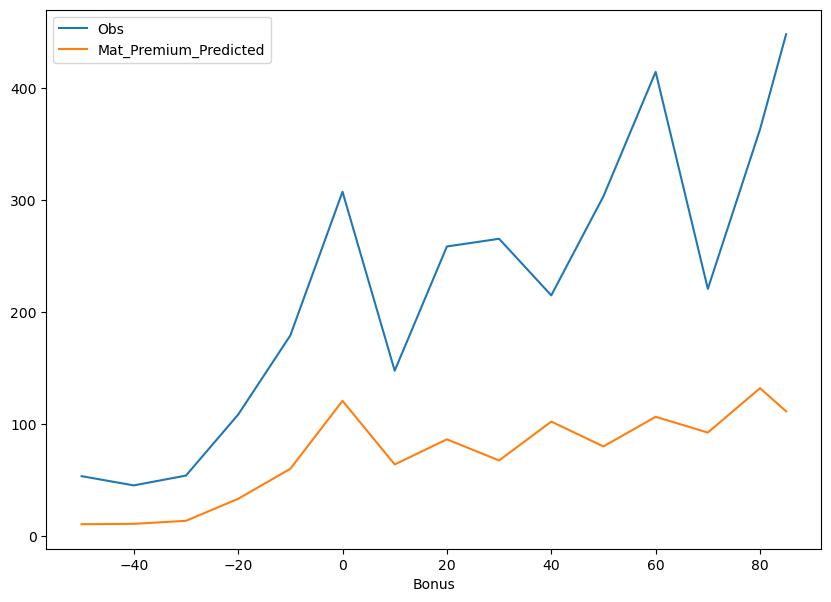

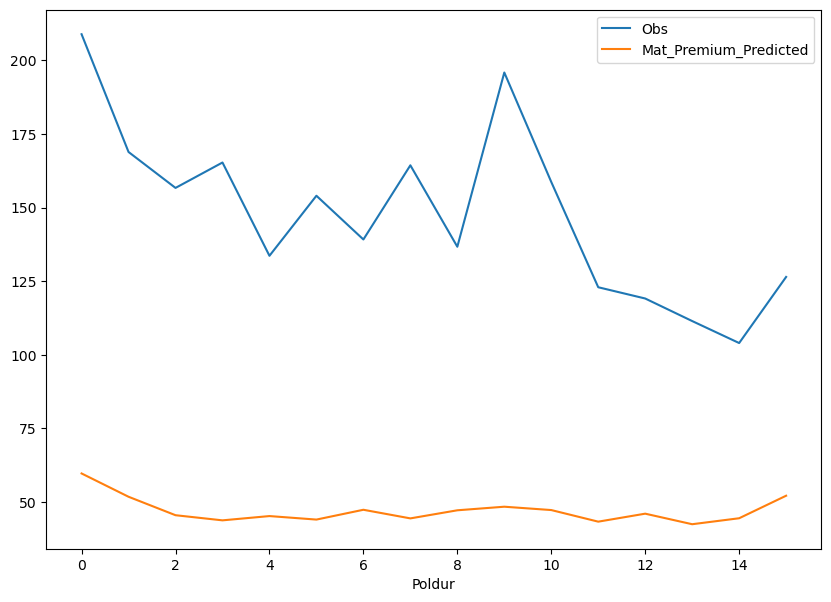

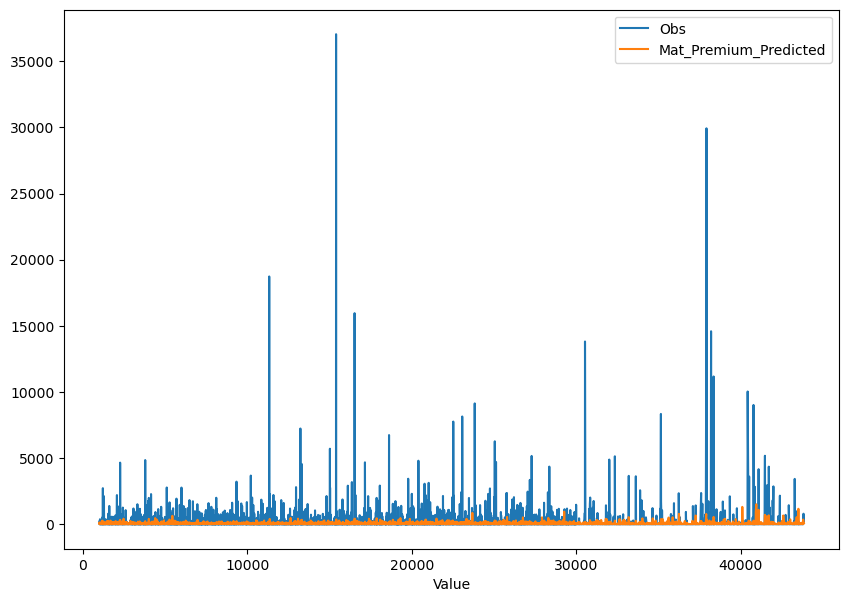

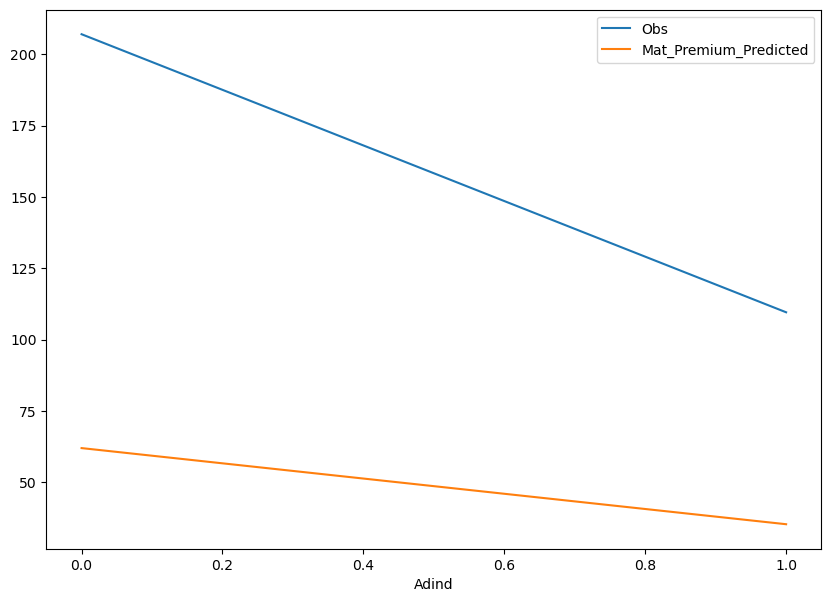

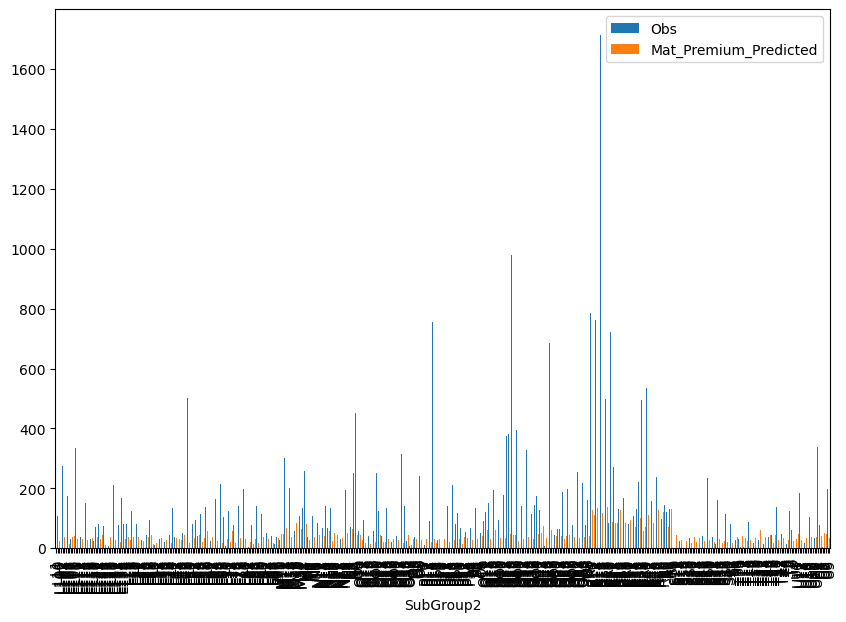

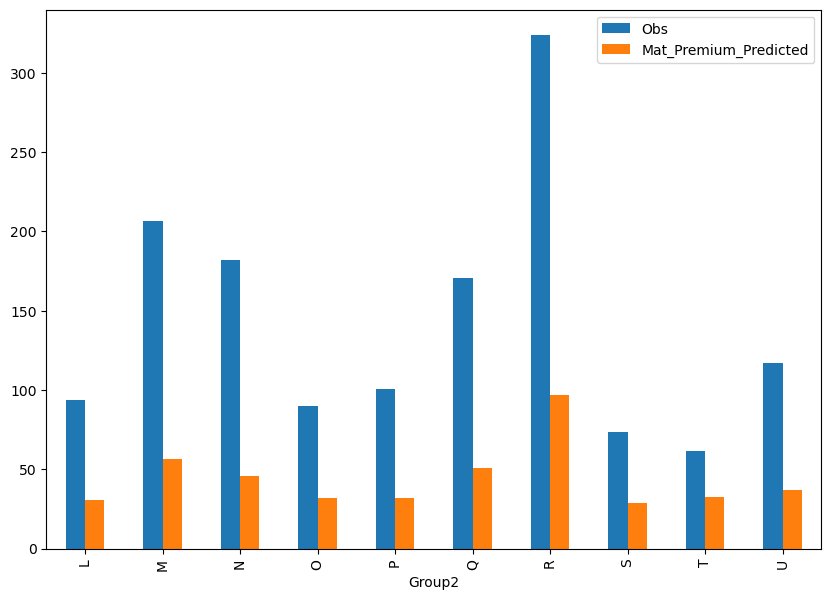

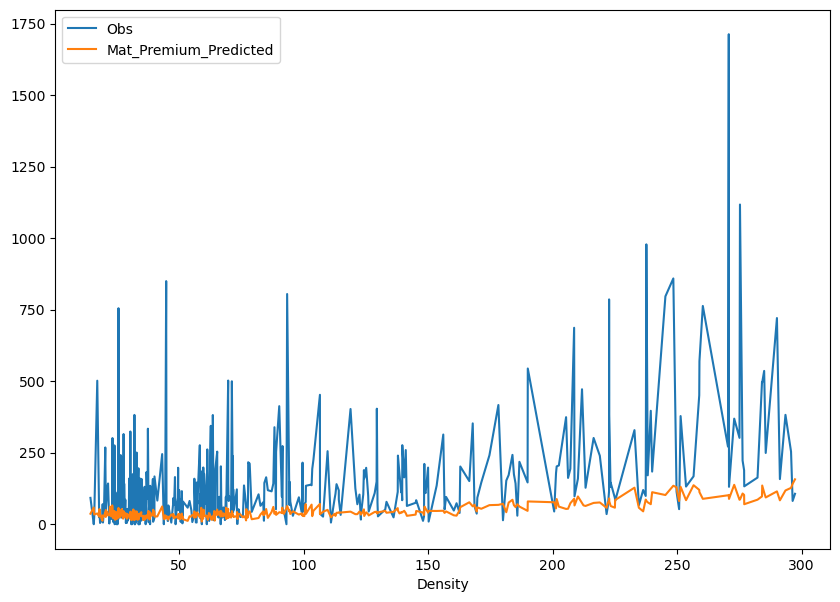

In [88]:
#Impact of target variable on the remaining variables
dataProv = pd.DataFrame(prime_mat.index)
dataProv.columns = ['index']
dataProv['Obs'] = np.array(prime_mat)
dataProv['Mat_Premium_Predicted'] =  prime_predi_mat

# dataProv['Pred_xgb_grid'] = p_xgb_grid
dataProv.head()

dataFinale = df.copy().reset_index().merge(dataProv)
dataFinale.head()
palette = "deep"

for var in dataFinale.columns[3:16]:
    dataPlot = dataFinale.groupby([var])[['Obs', 'Mat_Premium_Predicted']].mean()
    
    if dataFinale[var].dtypes == 'O':
        # Créer un graphique à barres avec des couleurs de la palette
        ax = dataPlot.plot(kind='bar', figsize=(10, 7))
        ax.set_prop_cycle(color=sns.color_palette(palette))
    else:
        # Créer un graphique linéaire avec des couleurs de la palette
        ax = dataPlot.plot(figsize=(10, 7))
        ax.set_prop_cycle(color=sns.color_palette(palette))

plt.show()